<a href="https://colab.research.google.com/github/qhrtandayu/qhrtandayu/blob/main/Final_Case_Study_Netflix_Dataset_by_Tandayu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Loading & Overview**

In [14]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles (3).csv


In [15]:
import pandas as pd

# Adjust the filename as necessary
df = pd.read_csv('netflix_titles.csv')

# Output dimensions and initial rows
print("Dimensions:", df.shape)
display(df.head())
display(df.tail())

Dimensions: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


**2. Data Cleaning**

In [8]:
# Checking for missing entries in the dataframe
missing_values = df.isnull().sum()
missing_values_proportion = (missing_values / len(df)) * 100

missing_values[missing_values > 0], missing_values_proportion[missing_values > 0]

(director      2634
 cast           825
 country        831
 date_added      10
 rating           4
 duration         3
 dtype: int64,
 director      29.908028
 cast           9.367549
 country        9.435676
 date_added     0.113546
 rating         0.045418
 duration       0.034064
 dtype: float64)

In [9]:
# Fill in the missing values with appropriate placeholders
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df['rating'].fillna('NR', inplace=True)  # 'NR' designates Not Rated
df['duration'].fillna('Unknown', inplace=True)

# Confirm that there are no missing entries remain
df.isnull().sum()

<ipython-input-9-eb5b2c2d8b6c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-9-eb5b2c2d8b6c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


**3. Data Types & Conversion**

In [ ]:
# Check the current data types
print("Before conversion:\n", df.dtypes)

# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Check the updated data types
print("\nAfter conversion:\n", df.dtypes)

Before conversion:
 show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

After conversion:
 show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


In [ ]:
# Inspect data types for all attributes
data_types_initial = df.dtypes

# Convert 'date_added' to datetime, errors='coerce' will transform unparseable dates into NaT
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Inspect updated data types
data_types_subsequent = df.dtypes

data_types_initial, data_types_subsequent

(show_id         object
 type            object
 title           object
 director        object
 cast            object
 country         object
 date_added      object
 release_year     int64
 rating          object
 duration        object
 listed_in       object
 description     object
 dtype: object,
 show_id                 object
 type                    object
 title                   object
 director                object
 cast                    object
 country                 object
 date_added      datetime64[ns]
 release_year             int64
 rating                  object
 duration                object
 listed_in               object
 description             object
 dtype: object)

**4. Univariate Analysis**

1. How many Movies vs. TV Shows are there?

In [16]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


2. What are the top 5 most common ratings?

In [ ]:
df['rating'].value_counts().head(5)

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490


3. Which release year appears most frequently?

In [ ]:
df['release_year'].value_counts().head(1)

,count
release_year,
2018,1147


**5. Duration & Seasons**

In [10]:
# Create two columns
df['duration_minutes'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['num_seasons'] = df['duration_minutes'].where(df['type'] == 'TV Show', None)

# Keep movie durations in minutes
df['duration_minutes'] = df['duration_minutes'].where(df['type'] == 'Movie', None)

In [11]:
# Average duration of the Movies
avg_movie_length = df['duration_minutes'].dropna().mean()

# Average number of seasons of the TV Shows
avg_tv_seasons = df['num_seasons'].dropna().mean()

print(f"Average Movie Length: {avg_movie_length:.2f} minutes")
print(f"Average TV Show Seasons: {avg_tv_seasons:.2f} seasons")

Average Movie Length: 99.58 minutes
Average TV Show Seasons: 1.76 seasons


**6. Genre Analysis**

In [ ]:
# Construct a new DataFrame with a single genre per entry
df_genres = df[['title', 'release_year', 'listed_in']].copy()
df_genres['genre'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('genre')

In [ ]:
# Group them by genre and calculate average release year
avg_year_by_genre = df_genres.groupby('genre')['release_year'].mean().sort_values(ascending=False)

# Display the Top 10 genres with the most recent average release year
avg_year_by_genre.head(10)

,release_year
genre,
TV Mysteries,2018.346939
TV Horror,2018.200000
Reality TV,2017.894118
Stand-Up Comedy & Talk Shows,2017.857143
TV Thrillers,2017.736842
Crime TV Shows,2017.687234
Spanish-Language TV Shows,2017.477011
TV Action & Adventure,2017.404762
Docuseries,2017.232911


**7. Temporal Trends**

In [ ]:
# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

In [ ]:
# Calculate the difference between the year added and the release year
df['years_to_add'] = df['year_added'] - df['release_year']

In [ ]:
# Drop NaNs and calculate average delay
df['years_to_add'].dropna().describe()

,years_to_add
count,8709.000000
mean,4.690894
std,8.792208
min,-3.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,93.000000


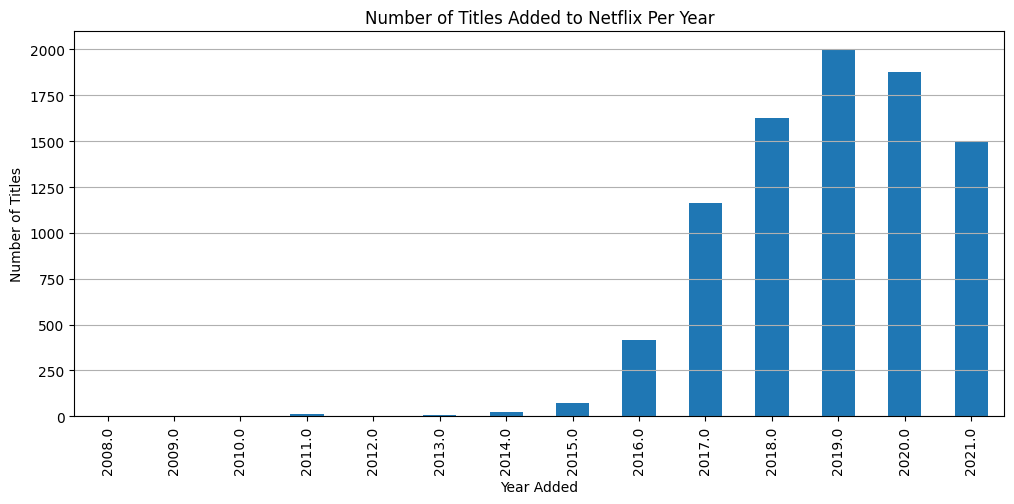

In [ ]:
import matplotlib.pyplot as plt

# Number of titles added per year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5))
plt.title("Number of Titles Added to Netflix Per Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(axis='y')
plt.show()

**8. Rating vs. Type**

In [ ]:
rating_type_crosstab = pd.crosstab(df['rating'], df['type'])
print(rating_type_crosstab)

type      Movie  TV Show
rating                  
66 min        1        0
74 min        1        0
84 min        1        0
G            41        0
NC-17         3        0
NR           77        7
PG          287        0
PG-13       490        0
R           797        2
TV-14      1427      733
TV-G        126       94
TV-MA      2062     1145
TV-PG       540      323
TV-Y        131      176
TV-Y7       139      195
TV-Y7-FV      5        1
UR            3        0


In [17]:
# Get proportions of each rating within content type
rating_type_proportion = pd.crosstab(df['rating'], df['type'], normalize='columns')
print(rating_type_proportion)

type         Movie   TV Show
rating                      
66 min    0.000163  0.000000
74 min    0.000163  0.000000
84 min    0.000163  0.000000
G         0.006690  0.000000
NC-17     0.000489  0.000000
NR        0.012237  0.001870
PG        0.046827  0.000000
PG-13     0.079948  0.000000
R         0.130038  0.000748
TV-14     0.232828  0.274121
TV-G      0.020558  0.035153
TV-MA     0.336433  0.428197
TV-PG     0.088106  0.120793
TV-Y      0.021374  0.065819
TV-Y7     0.022679  0.072924
TV-Y7-FV  0.000816  0.000374
UR        0.000489  0.000000


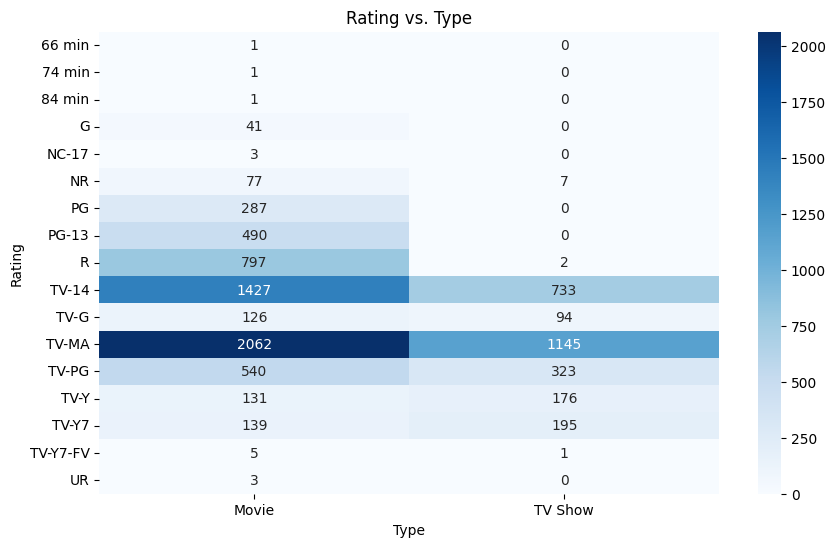

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the cross-tab
plt.figure(figsize=(10, 6))
sns.heatmap(rating_type_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title("Rating vs. Type")
plt.ylabel("Rating")
plt.xlabel("Type")
plt.show()

**9. Filtering & Querying**

In [18]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (4).csv


In [20]:
import pandas as pd

# Adjust the filename if needed
df = pd.read_csv('netflix_titles.csv')

In [21]:
# Convert date_added to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Filter R-rated content added after 2020
filtered_r_after_2020 = df[
    (df['rating'] == 'R') &
    (df['date_added'].dt.year > 2020)
]

# Output the result count
print(f"Number of R-rated titles added after 2020: {len(filtered_r_after_2020)}")

# Preview some results
filtered_r_after_2020[['title', 'date_added', 'release_year']].head()

Number of R-rated titles added after 2020: 190


,title,date_added,release_year
46,Safe House,2021-09-16,2012
48,Training Day,2021-09-16,2001
81,Kate,2021-09-10,2021
122,In the Cut,2021-09-02,2003
131,Blade Runner: The Final Cut,2021-09-01,1982


**10. Aggregations & GroupBy**

In [26]:
# Replace 'Unknown' with NaN temporarily to avoid skewed results
df_country_year = df.replace("Unknown", pd.NA)

# Group by country and calculate average release year
avg_release_year_by_country = df_country_year.groupby('country')['release_year'].mean().sort_values(ascending=False)

# Display the top 10 countries with the most recent average release year
avg_release_year_by_country.head(10)

,release_year
country,
"Italy, United Kingdom",2021.0
Mauritius,2021.0
"Belgium, United Kingdom",2021.0
"United States, Singapore",2021.0
"Mexico, France, Colombia",2021.0
"Italy, Brazil, Greece",2021.0
"Mexico, Brazil",2021.0
"United States, Brazil, Japan, Spain, India",2021.0
"Canada, United States, Ireland",2021.0


In [24]:
# Extract the year from 'date_added' into a new column
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year

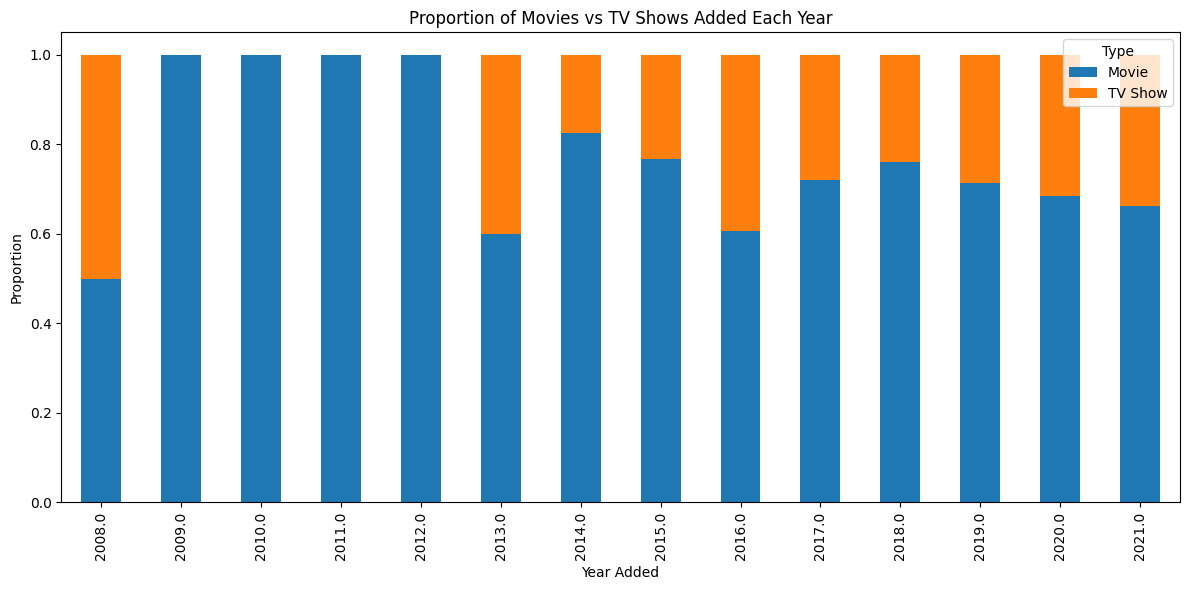

In [25]:
# Count how many Movies and TV Shows were added per year
type_per_year = df.groupby(['year_added', 'type']).size().unstack()

# Convert to proportions
type_proportion_per_year = type_per_year.div(type_per_year.sum(axis=1), axis=0)

# Plot the proportions
import matplotlib.pyplot as plt

type_proportion_per_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Proportion of Movies vs TV Shows Added Each Year")
plt.xlabel("Year Added")
plt.ylabel("Proportion")
plt.legend(title='Type')
plt.tight_layout()
plt.show()

**11. Applying Functions**

In [ ]:
def get_director_titles(name):
    # Filter for the director's titles
    return df[df['director'].str.contains(name, case=False, na=False)]\
             .sort_values(by='release_year')[['title', 'release_year', 'type', 'rating']]

# Example usage:
get_director_titles("Martin Scorsese")

,title,release_year,type,rating
8735,Who's That Knocking at My Door?,1967,Movie,R
7431,Mean Streets,1973,Movie,R
6111,Alice Doesn't Live Here Anymore,1974,Movie,PG
7820,Raging Bull,1980,Movie,R
6880,GoodFellas,1990,Movie,R
6826,Gangs of New York,2002,Movie,R
2632,No Direction Home: Bob Dylan,2005,Movie,TV-MA
8272,The Departed,2006,Movie,R
1358,Shutter Island,2010,Movie,R
2860,Hugo,2011,Movie,PG


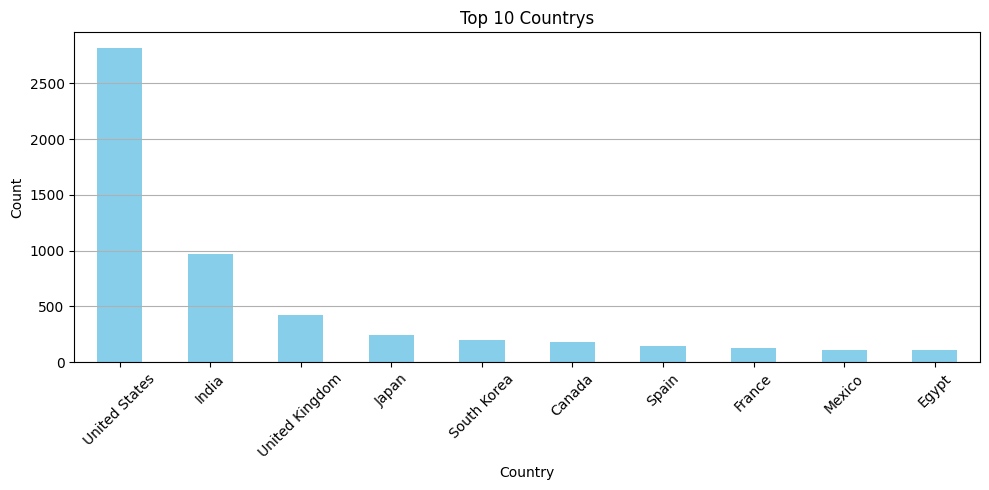

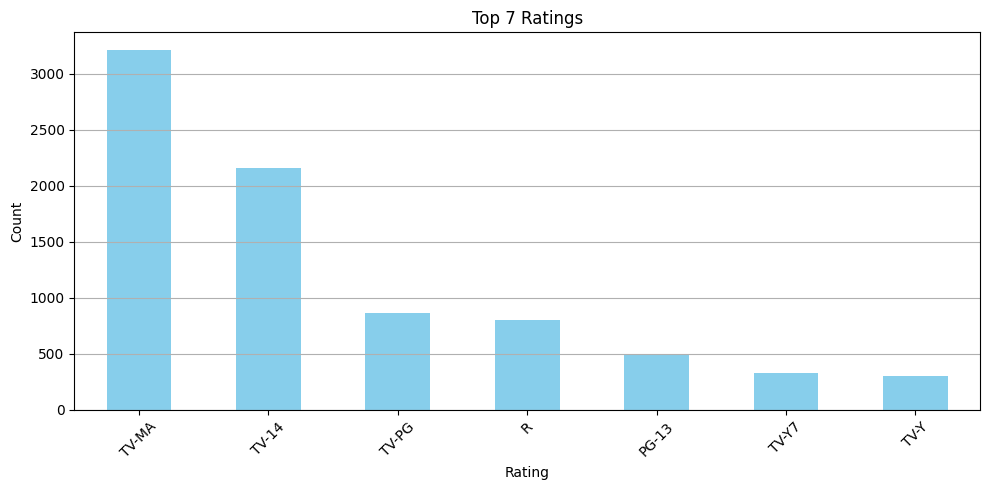

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_categories(column_name, top_n=10):
    plt.figure(figsize=(10, 5))
    df[column_name].value_counts().head(top_n).plot(kind='bar', color='skyblue')
    plt.title(f"Top {top_n} {column_name.capitalize()}s")
    plt.ylabel("Count")
    plt.xlabel(column_name.capitalize())
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_top_categories('country', top_n=10)
plot_top_categories('rating', top_n=7)

Shape: (8807, 13)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0



Missing values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added        98
dtype: int64

Type distribution:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Top 5 ratings:
 rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64

Most common release year:
 2018

Avg movie length: 99.58 min
Avg TV show seasons: 1.76

Genres with most recent average release year:
 genre
TV Mysteries                    2018.346939
TV Horror                       2018.200000
Reality TV                      2017.894118
Stand-Up Comedy & Talk Shows    2017.857143
TV Thrillers                    2017.736842
Name: release_year, dtype: float64

Years between release and Netflix addition:
 count    8709.000000
mean        4.690894
std    

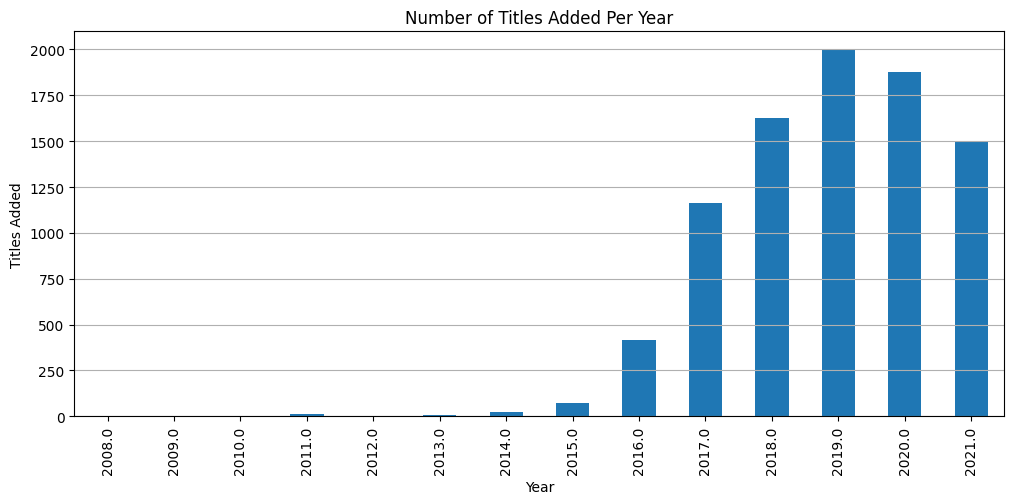

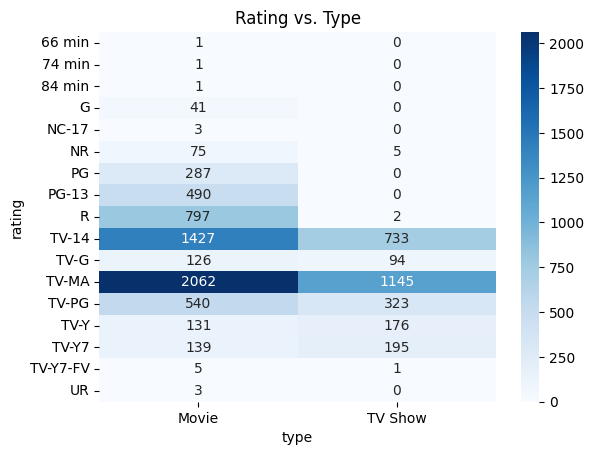


R-rated titles added after 2020: 190

Top countries by average release year:
 country
Italy, United Kingdom                         2021.0
Mauritius                                     2021.0
Belgium, United Kingdom                       2021.0
United States, Singapore                      2021.0
Mexico, France, Colombia                      2021.0
Italy, Brazil, Greece                         2021.0
Mexico, Brazil                                2021.0
United States, Brazil, Japan, Spain, India    2021.0
Canada, United States, Ireland                2021.0
Canada, United States, Cayman Islands         2021.0
Name: release_year, dtype: float64


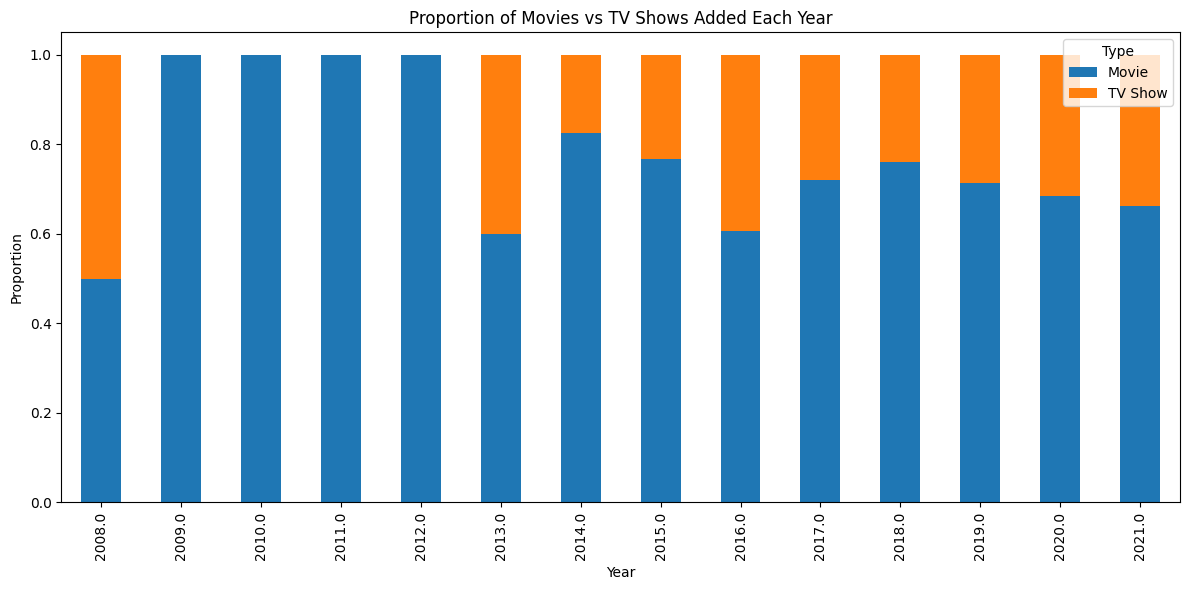

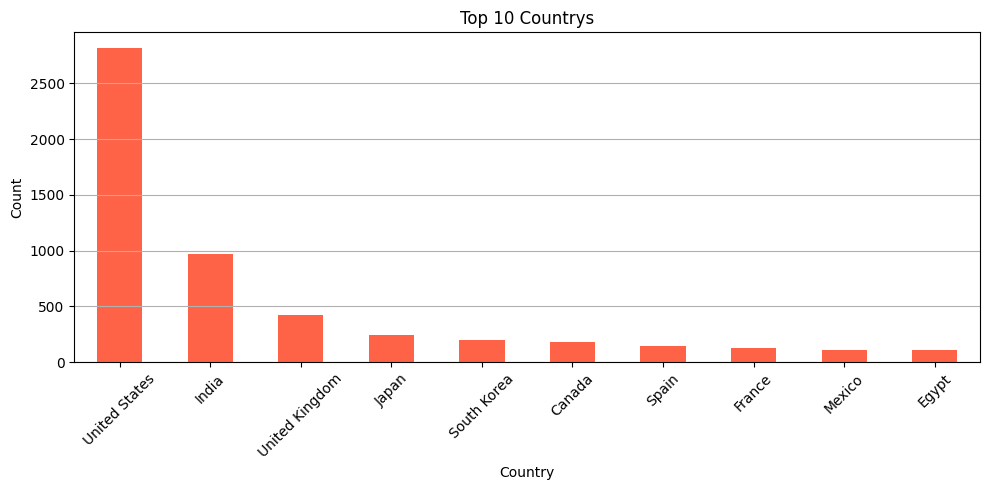

In [ ]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load the dataset (re-upload if needed)
df = pd.read_csv('netflix_titles.csv')

# 🧹 Data Cleaning & Type Conversion
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# 🔍 Initial Data Overview
print("Shape:", df.shape)
display(df.head(), df.tail())

# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# 🎯 Univariate Analysis
print("\nType distribution:\n", df['type'].value_counts())
print("\nTop 5 ratings:\n", df['rating'].value_counts().head(5))
print("\nMost common release year:\n", df['release_year'].value_counts().idxmax())

# ⏱️ Duration & Seasons Analysis
df['duration_minutes'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['num_seasons'] = df['duration_minutes'].where(df['type'] == 'TV Show')
df['duration_minutes'] = df['duration_minutes'].where(df['type'] == 'Movie')

print(f"\nAvg movie length: {df['duration_minutes'].dropna().mean():.2f} min")
print(f"Avg TV show seasons: {df['num_seasons'].dropna().mean():.2f}")

# 🎭 Genre Analysis
df_genres = df[['title', 'release_year', 'listed_in']].copy()
df_genres['genre'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('genre')
avg_year_by_genre = df_genres.groupby('genre')['release_year'].mean().sort_values(ascending=False)
print("\nGenres with most recent average release year:\n", avg_year_by_genre.head())

# 📆 Temporal Trends
df['years_to_add'] = df['year_added'] - df['release_year']
print("\nYears between release and Netflix addition:\n", df['years_to_add'].dropna().describe())

df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12, 5))
plt.title("Number of Titles Added Per Year")
plt.xlabel("Year")
plt.ylabel("Titles Added")
plt.grid(axis='y')
plt.show()

# 🎬 Rating vs Type
rating_type_crosstab = pd.crosstab(df['rating'], df['type'])
sns.heatmap(rating_type_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title("Rating vs. Type")
plt.show()

# 🔍 Filter: R-rated titles added after 2020
filtered_r_after_2020 = df[
    (df['rating'] == 'R') &
    (df['date_added'].dt.year > 2020)
]
print(f"\nR-rated titles added after 2020: {len(filtered_r_after_2020)}")

# 🌍 Aggregation: Avg release year by country
avg_year_country = df.groupby('country')['release_year'].mean().dropna().sort_values(ascending=False)
print("\nTop countries by average release year:\n", avg_year_country.head(10))

# 📊 Proportion of Movies vs. TV Shows Added Each Year
type_per_year = df.groupby(['year_added', 'type']).size().unstack()
type_prop = type_per_year.div(type_per_year.sum(axis=1), axis=0)

type_prop.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Proportion of Movies vs TV Shows Added Each Year")
plt.ylabel("Proportion")
plt.xlabel("Year")
plt.legend(title='Type')
plt.tight_layout()
plt.show()

# 🧠 Reusable Functions

def get_director_titles(name):
    return df[df['director'].str.contains(name, case=False, na=False)]\
             .sort_values(by='release_year')[['title', 'release_year', 'type', 'rating']]

def plot_top_categories(column, top_n=10):
    plt.figure(figsize=(10, 5))
    df[column].value_counts().head(top_n).plot(kind='bar', color='tomato')
    plt.title(f"Top {top_n} {column.capitalize()}s")
    plt.ylabel("Count")
    plt.xlabel(column.capitalize())
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Example: Top countries
plot_top_categories('country')